In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [4]:
worksheet = gc.open('dataset').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])

In [5]:
df.head()

,X,Y
0,10,35
1,20,65
2,30,95
3,40,125
4,50,155


In [6]:
df=df.astype({'X':'float'})
df=df.astype({'Y':'float'})

In [7]:
df.dtypes

X    float64
Y    float64
dtype: object

In [8]:
X=df[['X']].values
Y=df[['Y']].values

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=50)

In [10]:
scaler=MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train_scaled=scaler.transform(X_train)

In [13]:
ai_brain=Sequential([
    Dense(2,activation='relu'),
    Dense(1,activation='relu')
])

In [14]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [15]:
ai_brain.fit(x=X_train_scaled,y=Y_train,epochs=20000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 2.8656e-04
Epoch 17502/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8659e-04
Epoch 17503/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8656e-04
Epoch 17504/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8659e-04
Epoch 17505/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.8656e-04
Epoch 17506/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.8659e-04
Epoch 17507/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.8656e-04
Epoch 17508/20000
1/1 [==============================] - 0s 17ms/step - loss: 2.8659e-04
Epoch 17509/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.8656e-04
Epoch 17510/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.8659e-04
Epoch 17511/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.8

In [16]:
loss_df=pd.DataFrame(ai_brain.history.history)

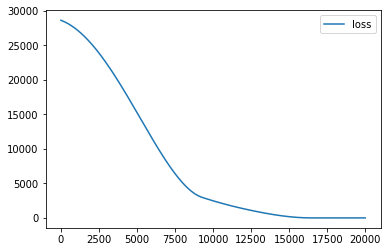

In [17]:
loss_df.plot()

In [18]:
X_test_scaled=scaler.transform(X_test)

In [19]:
ai_brain.evaluate(X_test_scaled,Y_test)

1/1 [==============================] - 0s 248ms/step - loss: 4.1222e-04


0.0004122229292988777

In [20]:
prediction_test=int(input("Enter the value to predict: "))
preds=ai_brain.predict(scaler.transform([[prediction_test]]))
print("The prediction for the given input "+str(prediction_test)+" is: "+str(preds))

Enter the value to predict:  120
The prediction for the given input 120 is: [[365.02945]]
